<a href="https://colab.research.google.com/github/megnaanand/spotify-data-analysis/blob/megna/Group12_spotify_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/sample_data/merged_playlist_without_duplicates_0_999.csv')

# List of features to analyze
features = ['POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS', 'ENERGY', 'INSTRUMENTALNESS',
            'VALENCE', 'TEMPO', 'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']

df['INSTRUMENTALNESS'] += 1
df['INSTRUMENTALNESS'] = np.log(df['INSTRUMENTALNESS'])

# Calculate the mean for each playlist and feature
playlist_means = df.groupby('PLAYLIST_id')[features].mean()

# Calculate the standard deviation for each playlist and feature
playlist_std_devs = df.groupby('PLAYLIST_id')[features].std()

# Calculate the Coefficient of Variation for each playlist and feature
playlist_cv = playlist_std_devs / playlist_means

# Calculate the mean Coefficient of Variation for each feature across all playlists
mean_cv_across_playlists = playlist_cv.mean()

print("Coefficient of Variation for Each Feature Across All Playlists:")
print(mean_cv_across_playlists.abs().sort_values(ascending=True))

Coefficient of Variation for Each Feature Across All Playlists:
DANCEABILITY        0.224474
TEMPO               0.231924
ENERGY              0.288321
LOUDNESS            0.361070
VALENCE             0.445566
KEY                 0.709440
MODE                0.739922
LIVENESS            0.748324
SPEECHINESS         0.766054
POPULARITY          0.882664
ACOUSTICNESS        1.103751
INSTRUMENTALNESS    3.894765
dtype: float64


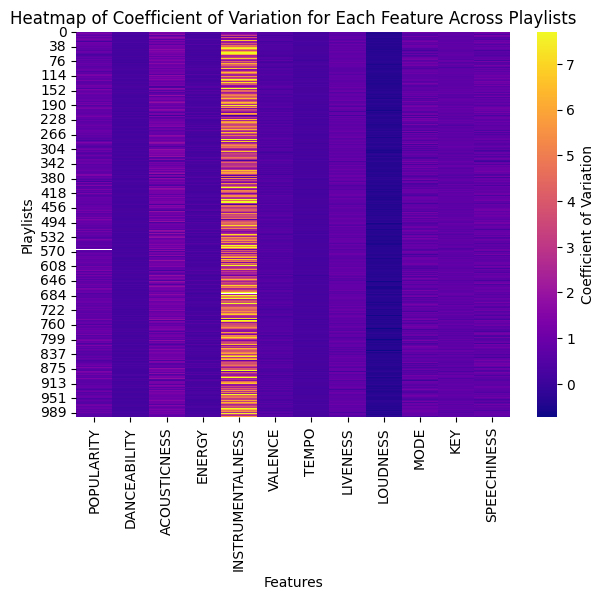

In [19]:
# Cap the values at the 95th percentile for each feature
cap_values = playlist_cv.quantile(0.95)
capped_playlist_cv = playlist_cv.clip(upper=cap_values, axis=1)

plt.figure(figsize=(7, 5))
sns.heatmap(capped_playlist_cv, cmap='plasma', cbar_kws={'label': 'Coefficient of Variation'})
plt.title('Heatmap of Coefficient of Variation for Each Feature Across Playlists')
plt.xlabel('Features')
plt.ylabel('Playlists')
plt.show()


In [20]:
happy_df_1 = df[df['PLAYLIST_name'] == 'happy']
happy_df_2 = df[df['PLAYLIST_name'] == 'Happy Happy Happy']
sad_df_1 = df[df['PLAYLIST_name'] == 'tears.']
sad_df_2 = df[df['PLAYLIST_name'] == 'sad']
hype_df_1 = df[df['PLAYLIST_name'] == 'hype']
hype_df_2 = df[df['PLAYLIST_name'] == 'Hype']

def analyze_playlists(df_1, df_2, mood):
  # Concatenate the two 'happy' playlist DataFrames, assuming there's a unique song identifier column named 'SONG_ID'
  total_df = pd.concat([df_1, df_2])
  # Drop duplicates based on the song identifier
  df_unique = total_df.drop_duplicates(subset='TRACK_uri')
  print(df_unique.shape)
  # Calculate the mean for each feature for the unique happy songs
  mean_df = df_unique[features].mean()
  # Calculate the standard deviation for each feature for the unique happy songs
  cv_df = df_unique[features].std()/mean_df
  print(mood + ' Means')
  print(mean_df)
  print('\n')
  print(mood + ' CVs')
  print(cv_df)
  print('\n')
  return mean_df, cv_df

mean_happy, cv_happy = analyze_playlists(happy_df_1, happy_df_2, 'Happy')
mean_sad, cv_sad = analyze_playlists(sad_df_1, sad_df_2, 'Sad')
mean_hype, cv_hype = analyze_playlists(hype_df_1, hype_df_2, 'Hype')

(106, 22)
Happy Means
POPULARITY           33.254717
DANCEABILITY          0.579340
ACOUSTICNESS          0.299475
ENERGY                0.620811
INSTRUMENTALNESS      0.020036
VALENCE               0.460890
TEMPO               117.617462
LIVENESS              0.146191
LOUDNESS             -7.243811
MODE                  0.877358
KEY                   4.245283
SPEECHINESS           0.053815
dtype: float64


Happy CVs
POPULARITY          1.000065
DANCEABILITY        0.232285
ACOUSTICNESS        1.054974
ENERGY              0.371413
INSTRUMENTALNESS    3.553818
VALENCE             0.527538
TEMPO               0.229782
LIVENESS            0.561022
LOUDNESS           -0.404928
MODE                0.375654
KEY                 0.863078
SPEECHINESS         0.948769
dtype: float64


(96, 22)
Sad Means
POPULARITY           28.437500
DANCEABILITY          0.486284
ACOUSTICNESS          0.526137
ENERGY                0.456509
INSTRUMENTALNESS      0.143050
VALENCE               0.294464
TEMPO    

In [24]:
def plot_distribution_bar_graphs(df_dict, features):
    # Number of features
    num_features = len(features)

    # Number of moods
    num_moods = len(df_dict)

    # Create a figure with subplots - one row for each feature, and one column for each mood
    fig, axes = plt.subplots(num_features, num_moods, figsize=(5 * num_moods, 4 * num_features))

    # Iterate through each feature and plot the distribution for each mood
    for i, feature in enumerate(features):
        for j, (mood, df) in enumerate(df_dict.items()):
            ax = axes[i, j] if num_features > 1 else axes[j]
            # Plot a histogram for the current mood and feature
            df[feature].plot(kind='hist', ax=ax, alpha=0.7, label=mood, bins=15)
            ax.set_title(f'{feature} - {mood}')
            ax.set_xlabel('Value')
            ax.set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [25]:
def plot_boxplots_for_moods(df_dict, features):
    # Number of features and moods
    num_features = len(features)
    num_moods = len(df_dict)

    # Create a figure with subplots
    fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

    # Iterate through each feature and plot the box plot for each mood
    for i, feature in enumerate(features):
        ax = axes[i] if num_features > 1 else axes
        # Gather data for each mood for the current feature
        data = [df[feature] for df in df_dict.values()]
        ax.boxplot(data, labels=df_dict.keys())
        ax.set_title(feature)
        ax.set_ylabel('Value')

    plt.tight_layout()
    plt.show()

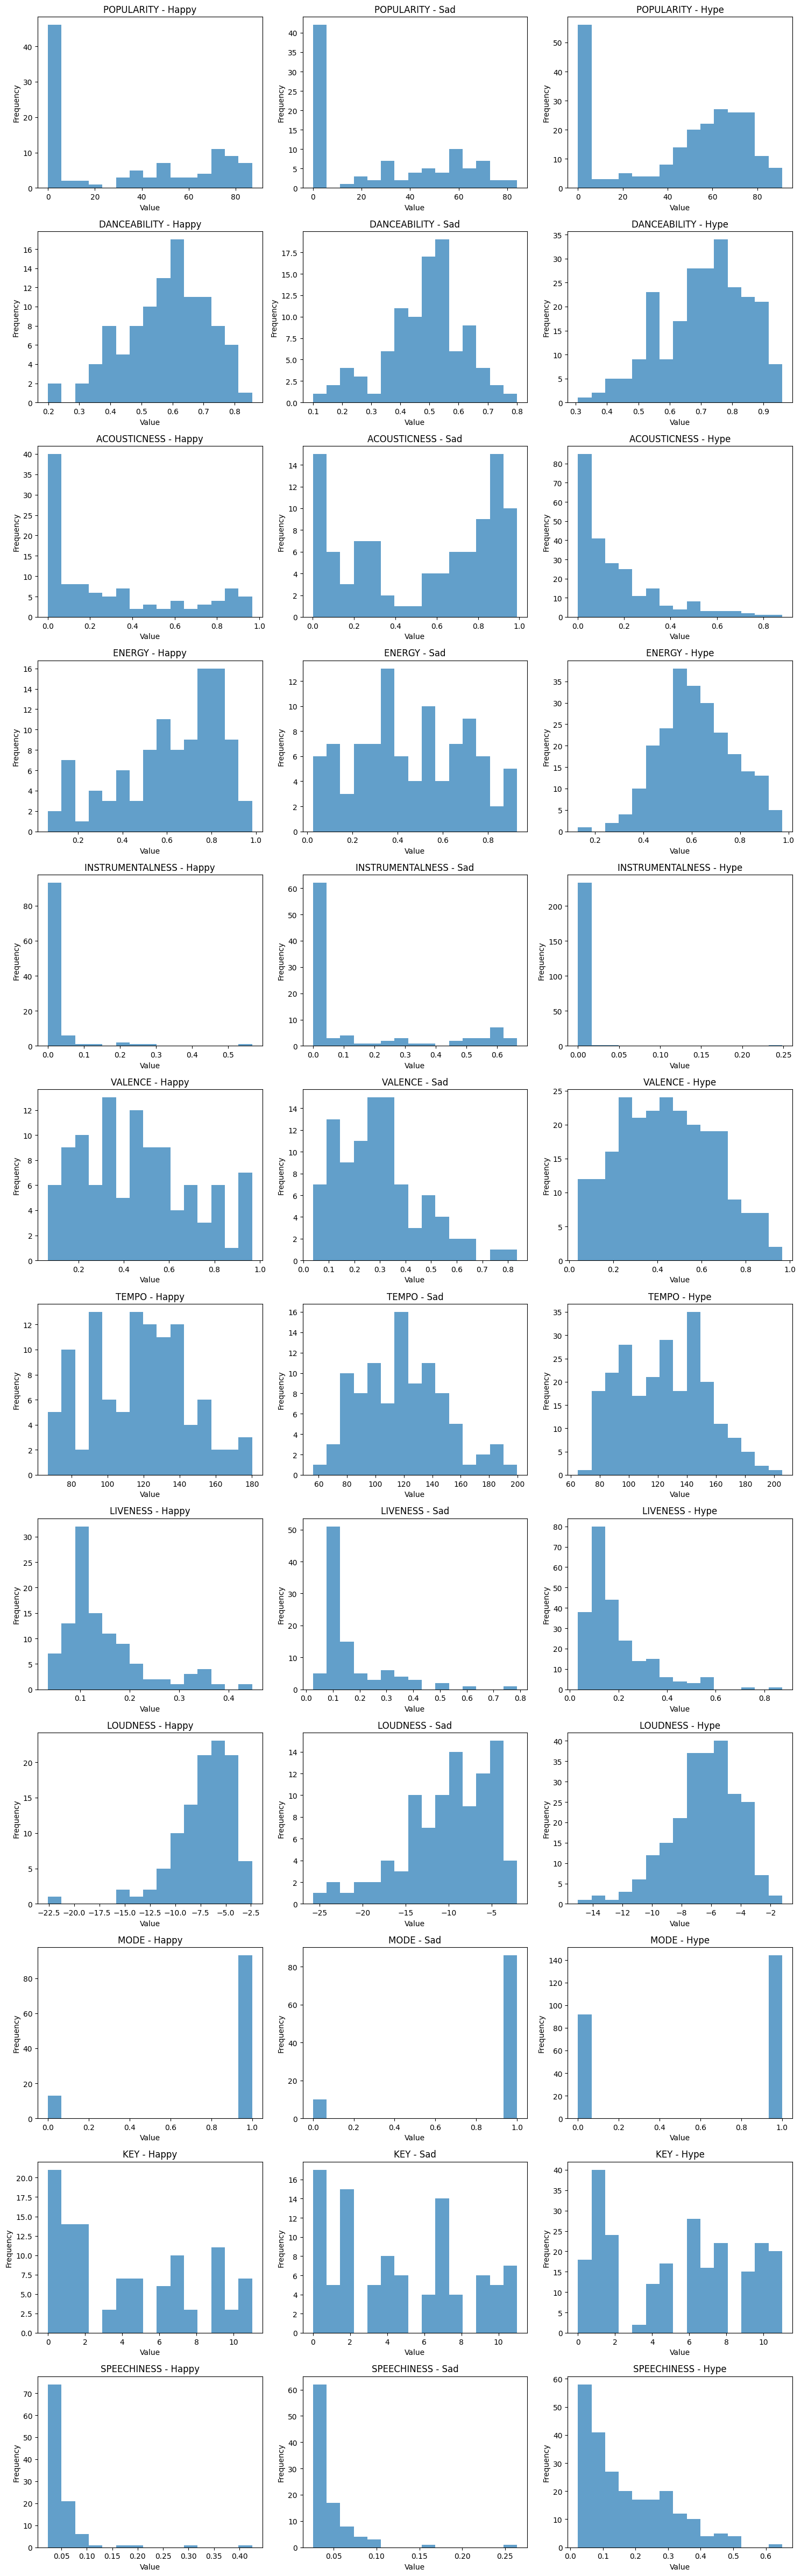

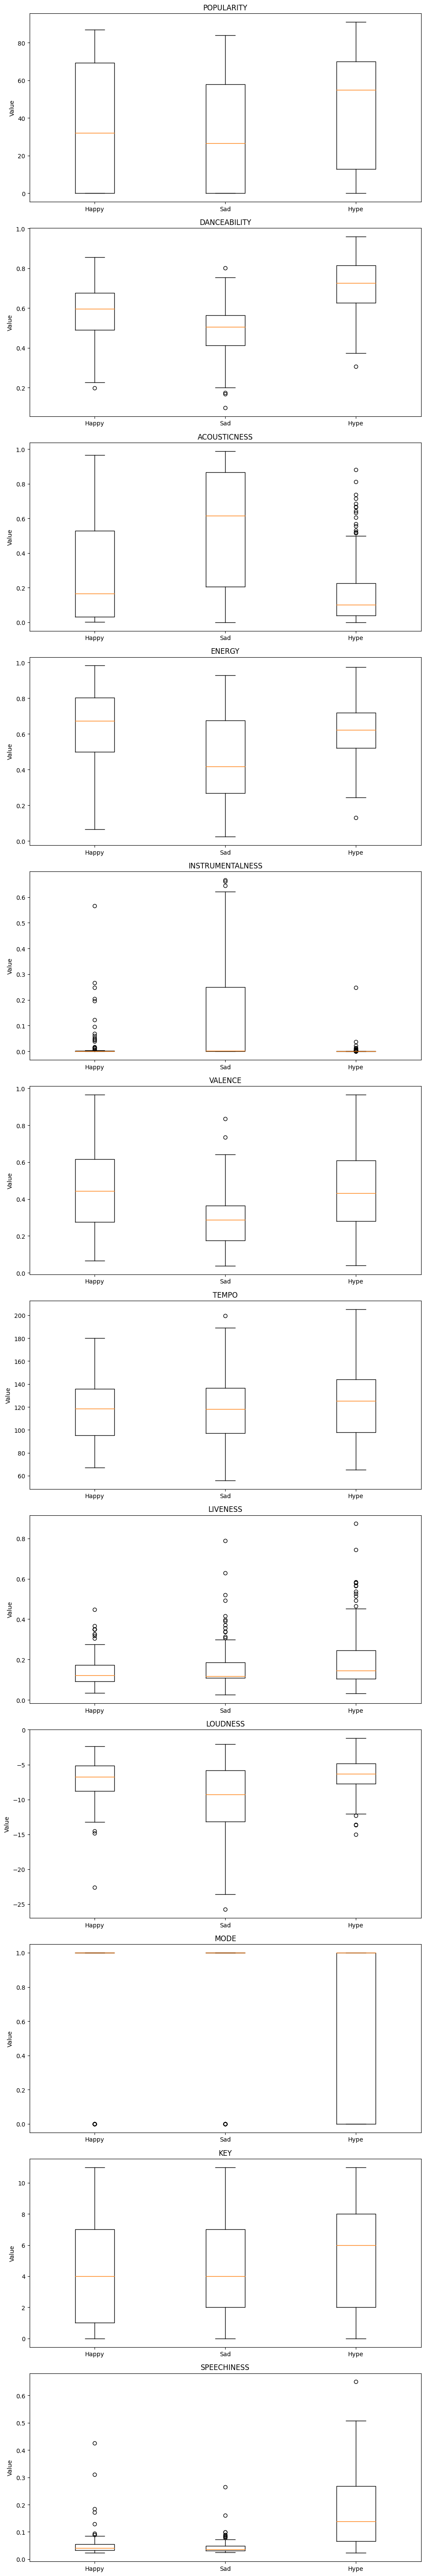

In [26]:
features = ['POPULARITY', 'DANCEABILITY', 'ACOUSTICNESS', 'ENERGY', 'INSTRUMENTALNESS',
            'VALENCE', 'TEMPO', 'LIVENESS', 'LOUDNESS', 'MODE', 'KEY', 'SPEECHINESS']

mood_dfs = {'Happy': pd.concat([happy_df_1, happy_df_2]).drop_duplicates(subset='TRACK_uri'),
            'Sad': pd.concat([sad_df_1, sad_df_2]).drop_duplicates(subset='TRACK_uri'),
            'Hype': pd.concat([hype_df_1, hype_df_2]).drop_duplicates(subset='TRACK_uri')}

plot_distribution_bar_graphs(mood_dfs, features)
plot_boxplots_for_moods(mood_dfs, features)